# Stats701 Homework 6, Winter 2018
### David Guo
#### davidguo@umich.edu

Discussion: Discussed 2 with Jeanhee Pak. 

Time to do each homework problem:

- Problem 1 took about 5 hours

- Problem 2 took about 1.5 hours
    
- Problem 3 took about 4 hours

- Write-up took about 2 hours

In [2]:
import numpy as np
import scipy.stats

import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

import math

### 1

#### 1.1

1) I use a Gamma distribution with a shape $a=4$. I normalize it with location at -2 and scale it with 1/2. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma)


2) I use the Poisson(1) - 1 mentioned in the HW setup.

3) I modify the Uniform distribution mentioned, using the location as $-\sqrt{3}$ so that the mean is $(\sqrt{12}-2\cdot\sqrt{3})=0$ and scale as $\sqrt{12}$. Thus the variance would be $(\sqrt{12}-\sqrt{3}-(-\sqrt{3}))^2/12 = 1$. So the distribution is

$\frac{\text{Unif}\left(-\sqrt{3},\sqrt{12}-\sqrt{3}\right)-\sqrt{3}}{\sqrt{12}}$


(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform)

4) The final distribution I use is the exponential $e^{-x}-1$. The location -1 to center the mean at 0.

In [237]:
# Gamma
a = 4
d1 = scipy.stats.gamma(a = a, loc = -2, scale = 1/2)

# Poisson(1) - 1
mu = 1
d2 = scipy.stats.poisson(mu = mu, loc = -1)

# sqrt(12)^-0.5(Uniform(-sqrt(3), -sqrt(3)+sqrt(12)) -sqrt(3))
d3 = scipy.stats.uniform(loc = -3**0.5, scale = 12**0.5)

# Exp
d4 = scipy.stats.expon(loc = -1, scale = 1)

In [238]:
# Check mean and variance
print(d1.stats(moments = 'mv'))
print(d2.stats(moments = 'mv'))
print(d3.stats(moments = 'mv'))
print(d4.stats(moments = 'mv'))

(array(0.), array(1.))
(array(0.), array(1.))
(array(0.), array(1.))
(array(0.), array(1.))


In [240]:
n = 20
m = 1000

Since we have to draw from the distribution multiple times, I write a function to do this so code is readable later on. I write functions also for plotting.

In [243]:
def get_indep_draw(X, n):
    emp = np.zeros(m)
    for i in range(m):
        X_samp = np.random.choice(X, size = n)
        emp[i] = (n**.5)*np.mean(X_samp)
    return emp

def set_y_axis(ymax): # to ensure same y-axis values
    plt.ylim(0, ymax)
    plt.yticks(np.arange(0,ymax + 0.1,0.1))

def make_hist(emp):
    (n, bins, patches) = plt.hist(emp, 50, normed = 1, range = xrange)

In [244]:
np.random.seed(293837)
emp1 = get_indep_draw(d1.rvs(size = m), n = 20)
emp2 = get_indep_draw(d2.rvs(size = m), n = 20)
emp3 = get_indep_draw(d3.rvs(size = m), n = 20)
emp4 = get_indep_draw(d4.rvs(size = m), n = 20)

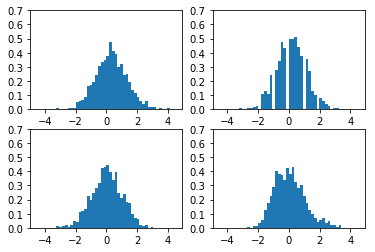

In [245]:
xrange = (-4.5,4.5)
plt.subplot(221)
set_y_axis(0.65)
make_hist(emp1)
plt.subplot(222)
set_y_axis(0.65)
make_hist(emp2)
plt.subplot(223)
set_y_axis(0.65)
make_hist(emp3)
plt.subplot(224)
set_y_axis(0.65)
make_hist(emp4)

#### 1.2

These are the labeled plots, with the implied "Sample Mean (n = 20) from distribution:" is added in title, but was not specified in the instructions.

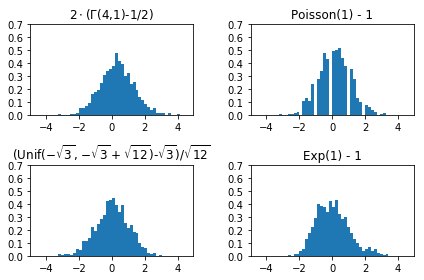

In [248]:
xrange = (-4.5,4.5)
plt.subplot(221)
set_y_axis(0.65)
plt.title('$2\cdot$($\Gamma$(4,1)-1/2)')
make_hist(emp1)

plt.subplot(222)
set_y_axis(0.65)
plt.title('Poisson(1) - 1')
make_hist(emp2)

plt.subplot(223)
set_y_axis(0.65)
plt.title('(Unif($-\sqrt{3}$, $-\sqrt{3}+\sqrt{12}$)-$\sqrt{3}$)/$\sqrt{12}$')
make_hist(emp3)

plt.subplot(224)
set_y_axis(0.65)
plt.title('Exp(1) - 1')
make_hist(emp4)

plt.tight_layout() # so title in 2nd row doesn't overlap, https://matplotlib.org/users/tight_layout_guide.html

#### 1.3

We add the standard normal as a solid line using the documentation linked in the homework.

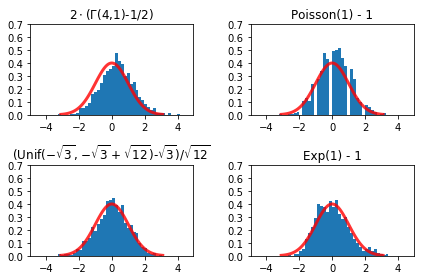

In [249]:
from scipy.stats import norm

xrange = (-4.5,4.5)
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100) # for normal dist

plt.subplot(221)
set_y_axis(0.65)
plt.title('$2\cdot$($\Gamma$(4,1)-1/2)')
make_hist(emp1)
plt.plot(x, norm.pdf(x), 'r-', lw=3, alpha=0.8, label='norm pdf')


plt.subplot(222)
set_y_axis(0.65)
plt.title('Poisson(1) - 1')
make_hist(emp2)
plt.plot(x, norm.pdf(x), 'r-', lw=3, alpha=0.8, label='norm pdf')


plt.subplot(223)
set_y_axis(0.65)
plt.title('(Unif($-\sqrt{3}$, $-\sqrt{3}+\sqrt{12}$)-$\sqrt{3}$)/$\sqrt{12}$')
make_hist(emp3)
plt.plot(x, norm.pdf(x), 'r-', lw=3, alpha=0.8, label='norm pdf')

plt.subplot(224)
set_y_axis(0.65)
plt.title('Exp(1) - 1')
make_hist(emp4)
plt.plot(x, norm.pdf(x), 'r-', lw=3, alpha=0.8, label='norm pdf')

plt.tight_layout()

#### 1.4

The plots do not look equally normal. The normalized sample mean of the uniform and gamma distributions are closest to being normal. The normalized sample mean of the exponential distribution is approximately normal. The Poisson distribution, being a discrete distribution, has some sparseness in its normalized sample mean distribution. Increasing the sample size n to 100 for both sample sizes makes the normalized sample mean distributions approach a normal distribution (the maximal y value for the Poisson now does not exceed 0.5)

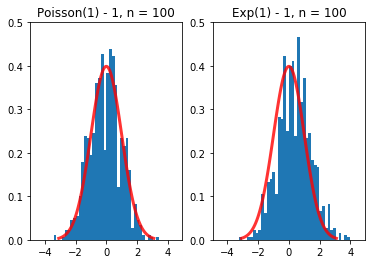

In [221]:
np.random.seed(293837)
exp_100 = get_indep_draw(d4.rvs(size = m), n = 100)
pois_100 = get_indep_draw(d2.rvs(size = m), n = 100)

xrange = (-4.5,4.5)
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100) # for normal dist

plt.subplot(121)
set_y_axis(0.5)
plt.title('Poisson(1) - 1, n = 100')
make_hist(pois_100)
plt.plot(x, norm.pdf(x), 'r-', lw=3, alpha=0.8, label='norm pdf')
plt.subplot(122)
set_y_axis(0.5)
plt.title('Exp(1) - 1, n = 100')
make_hist(pois_300)
plt.plot(x, norm.pdf(x), 'r-', lw=3, alpha=0.8, label='norm pdf')

### 2

#### 2.1

In [4]:
points = np.loadtxt("points.dlm")
labels = np.load("labels.npy")

In [5]:
points[:,:]

array([[0.4579593 , 0.54352873],
       [0.08891206, 0.76618616],
       [0.1464601 , 0.78467006],
       [0.64990065, 0.19183258],
       [0.57086316, 0.40393525],
       [0.29572486, 0.58500418],
       [0.15027556, 0.80593204],
       [0.25960085, 0.67009997],
       [0.47471736, 0.34099282],
       [0.43924813, 0.48635789],
       [0.49324641, 0.2586415 ],
       [0.57028107, 0.50604562],
       [0.35078376, 0.47766205],
       [0.70058495, 0.28676208],
       [0.58608077, 0.43146247],
       [0.31866683, 0.53642412],
       [0.31731621, 0.68709491],
       [0.24563737, 0.58151459],
       [0.5904017 , 0.3461213 ],
       [0.58237811, 0.33313413],
       [0.19892317, 0.67976276],
       [0.57546381, 0.35036447],
       [0.46371709, 0.5295031 ],
       [0.32796263, 0.45138817],
       [0.6607364 , 0.44828526],
       [0.46272305, 0.39791724],
       [0.49184597, 0.54705932],
       [0.50921879, 0.4074183 ],
       [0.61658102, 0.30684193],
       [0.23957465, 0.78174214],
       [0.

In [6]:
points[:,0]

array([0.4579593 , 0.08891206, 0.1464601 , 0.64990065, 0.57086316,
       0.29572486, 0.15027556, 0.25960085, 0.47471736, 0.43924813,
       0.49324641, 0.57028107, 0.35078376, 0.70058495, 0.58608077,
       0.31866683, 0.31731621, 0.24563737, 0.5904017 , 0.58237811,
       0.19892317, 0.57546381, 0.46371709, 0.32796263, 0.6607364 ,
       0.46272305, 0.49184597, 0.50921879, 0.61658102, 0.23957465,
       0.98788763, 0.43935002, 0.66482333, 0.60263426, 0.56837198,
       0.69657665, 0.42043429, 0.29179239, 0.24397187, 0.61875561,
       0.62094666, 0.33846404, 0.22457187, 0.60730626, 0.29762253,
       0.70057987, 0.52992117, 0.65451439, 0.48439029, 0.59316262,
       0.62393076, 0.28701875, 0.5669089 , 0.66209265, 0.61307133,
       0.53671542, 0.6895264 , 0.35133969, 0.44997511, 0.5394386 ,
       0.22968233, 0.11498777, 0.2455789 , 0.66046001, 0.7630166 ,
       0.64328726, 0.25315303, 0.60620086, 0.25670522, 0.16971348,
       0.29513861, 0.77097648, 0.60973289, 0.5525419 , 0.27241

In [7]:
labels

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.])

#### 2.2

We subset the points array using two arguments. We use a boolean to check if the index of a point is for label 0 or label 1. Then the 2nd argument, is the index for each element (each element is a length 2 array, so 0 indicates the first element x, and 1 indicates the 2nd element y).

(0, 1)

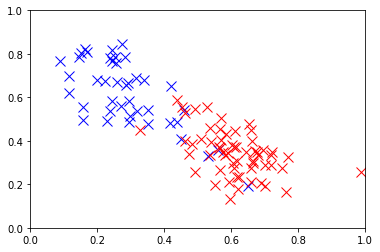

In [8]:
_ = plt.plot(points[labels == 0,0], points[labels == 0,1], 'xb',\
            points[labels == 1,0], points[labels == 1,1], 'xr', \
            markersize = 10)
plt.xlim([0,1])
plt.ylim([0,1])

#### 2.3

I followed the slides to construct the contour.

Using the fact that the cdf of the $\chi_{2}^{2}\left(p\right)$ is $1-e^{-\frac{p}{2}}$, then we can get the "height" (the level) for the boundary of the ellipse by plugging this value into the pdf.

(0, 1)

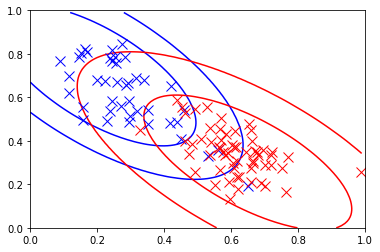

In [47]:
mu1 = np.array([0.2, 0.7])
Sigma1 = np.array([[0.015, -0.011],[-0.011, 0.018]])

mu2 = np.array([0.65, 0.3])
Sigma2 = np.array([[0.016, -0.011],[-0.011, 0.016]])

mvn1 = scipy.stats.multivariate_normal(mu1, Sigma1)
mvn2 = scipy.stats.multivariate_normal(mu2, Sigma2)

x, y = np.mgrid[0:1:0.01, 0:1:0.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

plt.contour(x,y,mvn1.pdf(pos), levels = [mvn1.pdf(1-math.exp(-0.68/2)), mvn1.pdf(1-math.exp(-0.95/2))], colors = 'b')
plt.contour(x,y,mvn2.pdf(pos), levels = [mvn2.pdf(1-math.exp(-0.68/2)), mvn2.pdf(1-math.exp(-0.95/2))], colors = 'r')

# Previous part
_ = plt.plot(points[labels == 0,0], points[labels == 0,1], 'xb',\
            points[labels == 1,0], points[labels == 1,1], 'xr', \
            markersize = 10)

plt.xlim([0,1])
plt.ylim([0,1])

#### 2.4

I deemed any point outside the 95% region for each normal distribution as an outlier. The red cluster appears normal. The blue cluster does not appear normal (due to the sparseness in the top-left region), and with 1 outlier.

In [48]:
#points[points[:,0] > 0.9][0]

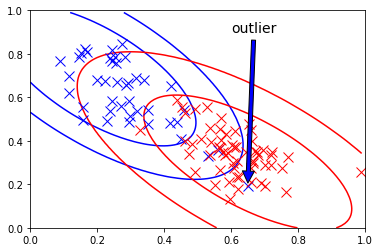

In [49]:
plt.contour(x,y,mvn1.pdf(pos), levels = [mvn1.pdf(1-math.exp(-0.68/2)), mvn1.pdf(1-math.exp(-0.95/2))], colors = 'b')
plt.contour(x,y,mvn2.pdf(pos), levels = [mvn2.pdf(1-math.exp(-0.68/2)), mvn2.pdf(1-math.exp(-0.95/2))], colors = 'r')

# Previous part
_ = plt.plot(points[labels == 0,0], points[labels == 0,1], 'xb',\
            points[labels == 1,0], points[labels == 1,1], 'xr', \
            markersize = 10)

plt.xlim([0,1])
plt.ylim([0,1])

# blue outliers, point with x > 0.6
outliers_blue = points[labels == 0][points[labels == 0,0] > 0.6]

plt.annotate("outlier", xy = (outliers_blue[0][0], outliers_blue[0][1]), xytext = (0.6, 0.9),
             fontsize = 14,
             arrowprops = dict(facecolor = 'b', shrink = 0.02))

### 3


#### 3.1

We check if the array is length 2, that is, we only have 2 dimensions. Then we check if each element is 0 or 1. If all of these entries are, then we return true, a valid board. If at least 1 element is not 0 or 1, the function returns false.

In [50]:
def is_valid_board(a):
    if isinstance(a,np.ndarray):
        if len(a.shape) == 2:
            if np.all(np.logical_or(a == 0, a == 1)):
                return True
        return False
    else:
        return False

In [51]:
a = np.array([[0,0,1,0],[1,1,1,0],[1,1,0,1]])
is_valid_board(a)

True

#### 3.2

In [52]:
def gol_step(a):
    if is_valid_board(a):
        # Get neighbor values
        new_board = np.zeros((a.shape[0], a.shape[1]))
        for r in range(a.shape[0]):
            for c in range(a.shape[1]):
                '''Get elements in previous, current and next row, and previous, current, and next column
                Since we count the same coordinate (r,c) we are on, which has index 4, we remove that from
                the neighbor array
                https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#arrays-indexing'''
                
                # cannot access index that is greater than range, so need to add the mod when checking to the right
                neighbors = np.delete(a[np.ix_([r-1, r, (r+1) % a.shape[0]],[c-1, c, (c+1) % a.shape[1]])].flatten(),4)
                
                if a[r,c] == 1: # if current cell live
                    if sum(neighbors) < 2 or sum(neighbors) > 3: # First 2 conditions to be dead
                        new_board[r,c] = 0
                    elif sum(neighbors) == 2 or sum(neighbors) == 3: # Conditions to be live
                        new_board[r,c] = 1
                elif a[r,c] == 0: # if current cell dead
                    if sum(neighbors) == 3:
                        new_board[r,c] = 1
        return new_board
    else:
        raise ValueError('valid board must be entered')

In [53]:
#Testing
#a = np.array([[1, 0, 1,0], [1, 0, 0,1],[0, 1, 1,0]])
#neighbors = np.array([])
#np.append(neighbors, [a[(-1, 0, 1),-1], a[(-1, 0, 1), 1], a[(-1, 1), 0]])

#### 3.3

In [54]:
def draw_gol_board(a):
    if isinstance(a, np.ndarray):
        if is_valid_board(a):
            # Create a new variable to avoid overwriting original board
            a_disp = (a + 1) % 2 # color map gray displays black for 0. Need this to invert color.
            plt.imshow(a_disp, 'gray')
            # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html#matplotlib.pyplot.xticks
            # Examples show nonzero list of labels, so using list with 0 entries removes ticks
            plt.xticks(np.arange(0))
            plt.yticks(np.arange(0))
            return plt.show()
        else:
            raise ValueError('Must input valid board')
    else:
        raise TypeError('Not a board type')

In [55]:
#a = np.array([[1, 0, 1,0], [1, 0, 0,1],[0, 1, 1,0]])

#draw_gol_board(a)

#### 3.4

In [56]:
glider = np.zeros((100,100))

glider[(1,2),(2,3)] = 1
glider[3, 1:4] = 1
glider[0:5, 0:5]

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0.]])

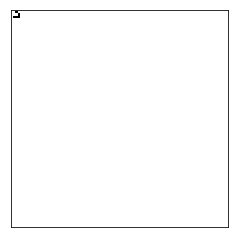

In [57]:
draw_gol_board(glider)

#### 3.5

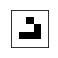

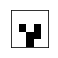

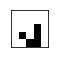

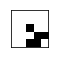

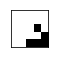

In [58]:
board_step = glider[0:5, 0:5]
for i in range(511, 516):
    plt.subplot(i)
    draw_gol_board(board_step)
    board_step = gol_step(board_step)